In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import requests
import io
from sklearn.model_selection import train_test_split 

#Part 2 libraries used
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

### Pre-Processing

In [2]:
url = "https://raw.githubusercontent.com/tkolencherry/ml_f23/main/HW_1/garments_worker_productivity.csv"
file = requests.get(url).content
prod_data = pd.read_csv(io.StringIO(file.decode('utf-8')))
prod_data.head()


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [3]:
prod_data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [4]:
prod_data.info()
#both info and describe because some of the data is categorial
#there are missing entries from wip (the number of unfinished iterms for products)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [5]:
prod_data.loc[prod_data["wip"] == 0]

#since there are no rows where the works in progress are zero, it seems acceptable to
#fill in zeroes for the null values

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity


In [6]:
prod_data = prod_data.fillna(0)
prod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [7]:
#now I want to check the quarter column
prod_data.quarter.value_counts()
#how are there five quarters? 

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [8]:
prod_data.loc[prod_data.quarter == "Quarter5"]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
498,1/29/2015,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
499,1/29/2015,Quarter5,finishing,Thursday,4,0.80,4.30,0.0,1200,0,0.0,0,0,10.0,0.989000
500,1/29/2015,Quarter5,sweing,Thursday,3,0.80,22.52,1287.0,6840,100,0.0,0,0,57.0,0.950186
501,1/29/2015,Quarter5,sweing,Thursday,4,0.80,22.52,1444.0,6900,88,0.0,0,0,57.5,0.900800
502,1/29/2015,Quarter5,sweing,Thursday,10,0.80,22.52,1088.0,6720,88,0.0,0,0,56.0,0.900130
503,1/29/2015,Quarter5,finishing,Thursday,6,0.50,2.90,0.0,1200,0,0.0,0,0,10.0,0.899000
504,1/29/2015,Quarter5,finishing,Thursday,8,0.65,4.15,0.0,960,0,0.0,0,0,8.0,0.877552
505,1/29/2015,Quarter5,finishing,Thursday,11,0.60,2.90,0.0,960,0,0.0,0,0,8.0,0.864583
506,1/29/2015,Quarter5,finishing,Thursday,10,0.80,3.94,0.0,1200,0,0.0,0,0,10.0,0.856950
507,1/29/2015,Quarter5,finishing,Thursday,1,0.75,3.94,0.0,1200,0,0.0,0,0,10.0,0.853667


In [9]:
prod_data.loc[prod_data.quarter == "Quarter1"].date.value_counts()

1/5/2015    22
1/7/2015    22
3/3/2015    22
1/4/2015    21
1/6/2015    21
3/4/2015    21
1/3/2015    21
3/1/2015    20
3/2/2015    20
1/1/2015    19
3/5/2015    19
2/4/2015    19
2/7/2015    19
2/3/2015    19
2/2/2015    19
2/1/2015    19
3/7/2015    19
2/5/2015    18
Name: date, dtype: int64

In [10]:
#change all of the Q5 entries to Q1 when we map
q_dict = {"Quarter1":1, "Quarter2":2, "Quarter3":3, "Quarter4":4, "Quarter5":1}

prod_data = prod_data.replace({'quarter':q_dict})
prod_data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [11]:
prod_data.department.value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [12]:
prod_data.loc[prod_data.department == "finishing"]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
18,1/1/2015,1,finishing,Thursday,11,0.70,4.15,0.0,1440,0,0.0,0,0,12.0,0.436326
602,2/4/2015,1,finishing,Wednesday,2,0.80,3.94,0.0,2160,0,0.0,0,0,18.0,0.966759
603,2/4/2015,1,finishing,Wednesday,1,0.80,3.94,0.0,1200,0,0.0,0,0,10.0,0.929183
604,2/4/2015,1,finishing,Wednesday,8,0.70,4.15,0.0,3000,0,0.0,0,0,25.0,0.915767
608,2/4/2015,1,finishing,Wednesday,7,0.70,3.94,0.0,960,0,0.0,0,0,8.0,0.779792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,2,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889


In [13]:
prod_data.loc[prod_data.department == "finishing "]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,1/1/2015,1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
6,1/1/2015,1,finishing,Thursday,2,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.755167
13,1/1/2015,1,finishing,Thursday,10,0.65,3.94,0.0,960,0,0.0,0,0,8.0,0.705917
14,1/1/2015,1,finishing,Thursday,8,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.676667
15,1/1/2015,1,finishing,Thursday,4,0.75,3.94,0.0,2160,0,0.0,0,0,18.0,0.593056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,2/3/2015,1,finishing,Tuesday,9,0.75,3.94,0.0,1320,0,0.0,0,0,11.0,0.919955
590,2/3/2015,1,finishing,Tuesday,12,0.80,4.08,0.0,1080,0,0.0,0,0,9.0,0.778222
596,2/3/2015,1,finishing,Tuesday,4,0.80,4.30,0.0,1440,0,0.0,0,0,12.0,0.537500
597,2/3/2015,1,finishing,Tuesday,6,0.70,2.90,0.0,960,0,0.0,0,0,8.0,0.495417


In [14]:
#Sewing is 1 and Finishing is 2
dep_dict = {"sweing":1, "finishing ": 2, "finishing":2}
prod_data = prod_data.replace({'department':dep_dict})
prod_data.department.value_counts()

1    691
2    506
Name: department, dtype: int64

In [15]:
prod_data.day.value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

In [16]:
#Sewing is 1 and Finishing is 2
day_dict = {"Monday":1, "Tuesday": 2, "Wednesday":3, "Thursday": 4, "Saturday": 5, "Sunday": 6,}
prod_data = prod_data.replace({'day':day_dict})
prod_data.day.value_counts()

3    208
6    203
2    201
4    199
1    199
5    187
Name: day, dtype: int64

In [17]:
prod_data.corr() 

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
quarter,1.000000,-0.000991,-0.009997,0.022426,-0.105497,0.012411,-0.063341,0.061362,-0.026264,-0.057848,-0.010972,0.249836,0.011284,-0.123779
department,-0.000991,1.000000,0.012437,-0.031753,0.067508,-0.874230,-0.388442,-0.677519,-0.045782,-0.049181,-0.096701,-0.300889,-0.939360,0.087624
day,-0.009997,0.012437,1.000000,-0.013554,0.024983,-0.006065,-0.110955,0.043026,-0.115137,0.029120,0.026772,-0.022511,-0.014450,-0.005104
team,0.022426,-0.031753,-0.013554,1.000000,0.030274,-0.110011,-0.011057,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753
targeted_productivity,-0.105497,0.067508,0.024983,0.030274,1.000000,-0.069489,0.019035,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,0.012411,-0.874230,-0.006065,-0.110011,-0.069489,1.000000,0.322704,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
wip,-0.063341,-0.388442,-0.110955,-0.011057,0.019035,0.322704,1.000000,0.276529,0.037946,-0.005101,-0.007119,0.053293,0.373908,0.047389
over_time,0.061362,-0.677519,0.043026,-0.096737,-0.088557,0.674887,0.276529,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,-0.026264,-0.045782,-0.115137,-0.007674,0.032768,0.032629,0.037946,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538
idle_time,-0.057848,-0.049181,0.029120,0.003796,-0.056181,0.056863,-0.005101,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851


In [18]:
prod_data.corr().actual_productivity.sort_values(ascending = False)

#let's pick our indicators - targeted_productivity, no_of_style_change, idle_men, quarter, and team
#our response variable is actual_productivity
#didn't select smv because it has such high correlation with factors already selected

actual_productivity      1.000000
targeted_productivity    0.421594
department               0.087624
incentive                0.076538
wip                      0.047389
day                     -0.005104
over_time               -0.054206
no_of_workers           -0.057991
idle_time               -0.080851
smv                     -0.122089
quarter                 -0.123779
team                    -0.148753
idle_men                -0.181734
no_of_style_change      -0.207366
Name: actual_productivity, dtype: float64

In [19]:
df = prod_data[["quarter", "targeted_productivity", "no_of_style_change", "idle_men", "team", "actual_productivity"]]
df.describe()

,quarter,targeted_productivity,no_of_style_change,idle_men,team,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,2.252297,0.729632,0.150376,0.369256,6.426901,0.735091
std,1.130974,0.097891,0.427848,3.268987,3.463963,0.174488
min,1.000000,0.070000,0.000000,0.000000,1.000000,0.233705
25%,1.000000,0.700000,0.000000,0.000000,3.000000,0.650307
50%,2.000000,0.750000,0.000000,0.000000,6.000000,0.773333
75%,3.000000,0.800000,0.000000,0.000000,9.000000,0.850253
max,4.000000,0.800000,2.000000,45.000000,12.000000,1.120437


In [20]:
x_quarter = df.quarter
x_targeted_productivity = df.targeted_productivity
x_no_of_style_change = df.no_of_style_change
x_idle_men = df.idle_men
x_team = df.team

y = df.actual_productivity

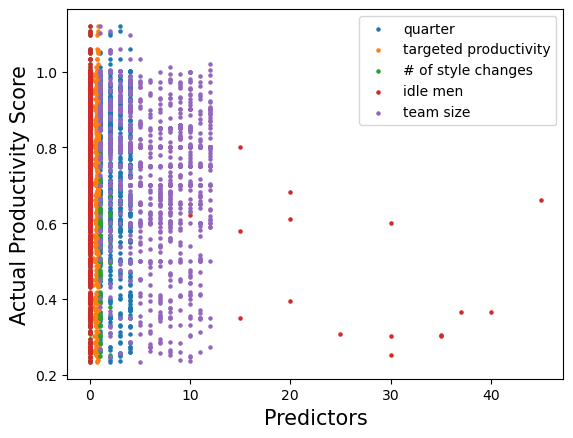

In [21]:
plt.scatter( x_quarter, y, s =5, label = "quarter")
plt.scatter( x_targeted_productivity,y, s =5, label = "targeted productivity")
plt.scatter(x_no_of_style_change, y,  s =5, label = "# of style changes")
plt.scatter(x_idle_men, y, s =5, label = "idle men")
plt.scatter(x_team, y,  s =5, label = "team size")
plt.legend(fontsize = 15)
plt.xlabel('Predictors', fontsize =15)
plt.ylabel("Actual Productivity Score", fontsize = 15)
plt.legend()
plt.show()

#if there is time, would be good to show a scatter plot but with the conditional means 
# E[Y|Quarter = 1] vs E[Y|Quarter = 2]

### Gradient Descent Class

In [22]:
class GSD_5:
    p1 = np.arange(0.000001,0.00001999,.0000001)
    
    def __init__(self, df, response_variable, n_pred,mode = "large"):
        self.df = df
        self.response = response_variable
        self.mode = mode
        self.npred = n_pred
        self.weights = []
        
    def xy_split (self):
        df_x = self.df.drop(self.response, axis = 1)
        df_y = self.df[self.response]

        x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, random_state = 42, test_size = 0.2)
    
        x_test = np.c_[np.ones(x_test.count()[0]), x_test]
        x_train = np.c_[np.ones(x_train.count()[0]), x_train]
    
        return x_train, x_test, y_train, y_test
    
    def gradient(self, x,y,w):
        if self.npred == 5:
            y_hat = np.dot(w,x.T) #y_hat = w0(1) + w1x1 + w2x2 +...
            residual = y_hat - y
            residual = residual.values
            x_0 = x[:, :1]
            x_1 = x[:, 1:2]
            x_2 = x[:, 2:3]
            x_3 = x[:, 3:4]
            x_4 = x[:, 4:5]
            x_5 = x[:, 5:6]
        #dot = np.dot(x_0.T,residual) - used for debugging
            return residual.mean(), np.dot(x_0.T,residual).mean(), np.dot(x_1.T,residual).mean(), np.dot(x_2.T,residual).mean(), np.dot(x_3.T,residual).mean(), np.dot(x_4.T,residual).mean(), np.dot(x_5.T,residual).mean()
        elif self.npred == 3: 
            y_hat = np.dot(w,x.T) #y_hat = w0(1) + w1x1 + w2x2 +...
            residual = y_hat - y
            residual = residual.values
            x_0 = x[:, :1]
            x_1 = x[:, 1:2]
            x_2 = x[:, 2:3]
            x_3 = x[:, 3:4]

            return residual.mean(), np.dot(x_0.T,residual).mean(), np.dot(x_1.T,residual).mean(), np.dot(x_2.T,residual).mean(), np.dot(x_3.T,residual).mean()
        elif self.npred == 1:
            y_hat = np.dot(w,x.T) #y_hat = w0(1) + w1x1 + w2x2 +...
            residual = y_hat - y
            residual = residual.values
            x_0 = x[:, :1]
            x_1 = x[:, 1:2]
            
            return residual.mean(), np.dot(x_0.T,residual).mean(), np.dot(x_1.T,residual).mean(),
            
    def gd(self, gradient, x, y, start, learn_rate=0.1, n_iter = 50, tolerance = .01):
        vector = start
        diff = 0
        for i in range(n_iter):
        
            diff = learn_rate*np.array(self.gradient(x,y,vector))  

            if np.all(np.abs(diff) <= tolerance):
                break
            else:
                if(self.npred == 5):
                    vector -= diff[1:7] #the first column is the mean residuals, the rest are the partial derivatives w/ respect to x_i
                elif(self.npred == 3):
                    vector -= diff[1:5]
                elif(self.npred == 1):
                    vector -= diff[1:3]
        return vector

    #function for returning assessment measures
    def lr_assessment (self, weights,x_train, y_train, x_observed, y_test): 
        train_yhat = []
        test_yhat = []
        n_train = len(y_train)
        n_test = len(y_test)
    
        #use our suggested weights to generate a y-hat array for train values
        for subset in x_train:
            if self.npred ==5: 
                temp_yhat = weights[0] + weights[1]*subset[1] + weights[2]*subset[2] + weights[3]*subset[3] + weights[4]*subset[4] + weights[5]*subset[5]
            elif self.npred ==3: 
                temp_yhat = weights[0] + weights[1]*subset[1] + weights[2]*subset[2] + weights[3]*subset[3] 
            elif self.npred ==1: 
                temp_yhat = weights[0] + weights[1]*subset[1]
            
            train_yhat.append(temp_yhat)
    
        #use our suggested weights to generate a y-hat array for test values
        for subset in x_test:
            if self.npred ==5: 
                temp_yhat = weights[0] + weights[1]*subset[1] + weights[2]*subset[2] + weights[3]*subset[3] + weights[4]*subset[4] + weights[5]*subset[5]
            elif self.npred ==3: 
                temp_yhat = weights[0] + weights[1]*subset[1] + weights[2]*subset[2] + weights[3]*subset[3] 
            elif self.npred ==1: 
                temp_yhat = weights[0] + weights[1]*subset[1]
                
            test_yhat.append(temp_yhat)
            
        #then calculate the training MSE
        train_SE = ((train_yhat-y_train).values)**2
        train_MSE = train_SE.sum()/n_train


        #then calculate the training MSE
        test_SE = ((test_yhat-y_test).values)**2
        test_MSE = test_SE.sum()/n_test
    
        return train_MSE, test_MSE, train_yhat, test_yhat
    
    def loop_learning(self, x_train, x_test, y_train, y_test,  seed, upper, learn_array, n_iter, threshold = 0.1):
    #generate random weights (seed = 175)
        self.min_test = 1000000
        self.min_p = 1000000
        test_MSEs = []
        train_MSEs = []
        train_r2_adjs = []
        test_r2_adjs = []
        np.random.seed(seed)
        
        if self.mode == "large":
            temp_weights = np.random.randint(0,upper,(self.npred+1))*1.0 # we need w0, w1, w2, w3, w4, w5, w6
            beg_wt = temp_weights.copy()
        else: 
            temp_weights = np.random.rand(self.npred +1)
            temp_weights = temp_weights.astype(float)
            beg_wt = temp_weights.copy()

#n = 100
        for i in learn_array:
            sugg_weights = self.gd(self.gradient, x_train, y_train, temp_weights, i, n_iter, threshold)
            train_MSE, test_MSE, train_yhat, test_yhat = self.lr_assessment(sugg_weights,x_train, y_train, x_test, y_test) 
            train_MSEs.append(train_MSE)
            test_MSEs.append(test_MSE)
            
            if test_MSE < self.min_test: 
                self.min_test = test_MSE
                self.min_p = i
        print("****MODEL PARAMETERS**** \n", )
        print("Weights")
        for l in range(self.npred+1): 
            print("w_",l," : ", beg_wt[l], "------->", sugg_weights[l])
            
        print("Iterations : ", n_iter, "\n Threshold : ", threshold, "\n Number of Predictors : ", self.npred)
        print("\n Minimum Test MSE",self.min_test, " for Learning Rate = ",self.min_p) 
        plt.plot(self.p1,train_MSEs, label = "Training MSE")
        plt.plot(self.p1,test_MSEs, label = "Test MSE")
        plt.title("Training vs Test Errors for Varying Learning Rates")
        plt.legend(loc = "upper right")
        plt.xlabel("Learning Rate")
        plt.ylabel("Error Rate")
        plt.show()
        
        self.min_test = 1000000
        self.min_p = 1000000
        return
        
    def regression(self, x_train, x_test, y_train, y_test, learn_array, learning_type, max_iter, threshold):
        train_mses = []
        test_mses = []
        min_test = 1000
        min_p = 1000

        for i in learn_array:
            model = SGDRegressor(alpha=i, eta0=0.001, learning_rate = learning_type, max_iter = max_iter, tol = threshold)
            model.fit(x_train, y_train)
            y_train_predict = model.predict(x_train)
            train_mse = mean_squared_error(y_train, y_train_predict)
            y_test_predict = model.predict(x_test)
            test_mse = mean_squared_error(y_test, y_test_predict)
            train_mses.append(train_mse)
            test_mses.append(test_mse)
            if test_mse < min_test: 
                min_test = test_mse
                min_p = i

        print("WEIGHT ESTIMATION")
        for l in range(self.npred+1): 
            print("w_",l," : ", model.coef_[l])
   
        print("\n Minimum Test MSE",min_test, " for Learning Rate = ", min_p) 
        plt.plot(self.p1,train_mses, label = "Training MSE")
        plt.plot(self.p1,test_mses, label = "Test MSE")
        plt.title("Training vs Test Errors for Varying Learning Rates")
        plt.legend(loc = "upper right")
        plt.xlabel("Learning Rate")
        plt.ylabel("Error Rate")
        plt.show()
        
    def residual_plot(self, weights, x_train, x_test, y_train, y_test): 
        train_yhat = []
        test_yhat = []
        #use our suggested weights to generate a y-hat array for train values
        for subset in x_train:
            if self.npred ==5: 
                temp_yhat = weights[0] + weights[1]*subset[1] + weights[2]*subset[2] + weights[3]*subset[3] + weights[4]*subset[4] + weights[5]*subset[5]
            elif self.npred ==3: 
                temp_yhat = weights[0] + weights[1]*subset[1] + weights[2]*subset[2] + weights[3]*subset[3] 
            elif self.npred ==1: 
                temp_yhat = weights[0] + weights[1]*subset[1]
            
            train_yhat.append(temp_yhat)
    
        #use our suggested weights to generate a y-hat array for test values
        for subset in x_test:
            if self.npred ==5: 
                temp_yhat = weights[0] + weights[1]*subset[1] + weights[2]*subset[2] + weights[3]*subset[3] + weights[4]*subset[4] + weights[5]*subset[5]
            elif self.npred ==3: 
                temp_yhat = weights[0] + weights[1]*subset[1] + weights[2]*subset[2] + weights[3]*subset[3] 
            elif self.npred ==1: 
                temp_yhat = weights[0] + weights[1]*subset[1]
                
            test_yhat.append(temp_yhat)
        
        train_resids = (y_train - train_yhat)
        test_resids = (y_test - test_yhat)
            
        plt.scatter(train_yhat, train_resids) 
        plt.title("Residual Plot for Model Training")
        plt.axhline(y=0, color='r', linestyle='-')
        plt.xlabel("Predicted Y")
        plt.ylabel("Residuals")
        plt.show()
        
        plt.scatter(test_yhat, test_resids) 
        plt.title("Residual Plot for Model Testing")
        plt.axhline(y=0, color='r', linestyle='-')
        plt.xlabel("Predicted Y")
        plt.ylabel("Residuals")
        plt.show()

### Part 1
#### Experimenting with Varying Learning Rates, Iterations, and Thresholds

****MODEL PARAMETERS**** 

Weights
w_ 0  :  6.0 -------> 4.775748942794789
w_ 1  :  3.0 -------> 0.07092332039438708
w_ 2  :  4.0 -------> 3.1154425326298245
w_ 3  :  6.0 -------> 5.643560463394214
w_ 4  :  2.0 -------> 0.3235840897557365
w_ 5  :  7.0 -------> -0.9381289305425192
Iterations :  100 
 Threshold :  0.1 
 Number of Predictors :  5

 Minimum Test MSE 18.30359047398677  for Learning Rate =  1.8700000000000017e-05


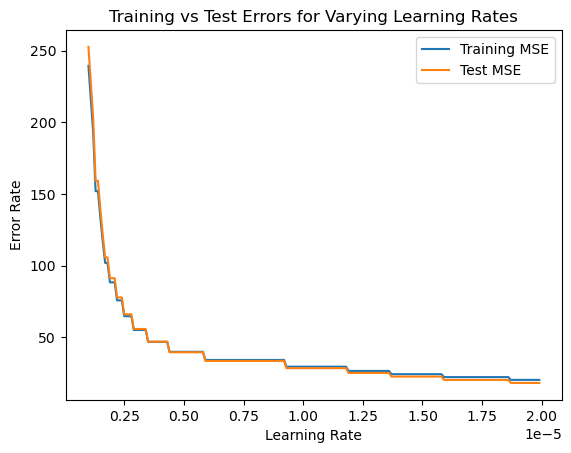

In [23]:
temp1 = GSD_5(df,"actual_productivity",5)
x_train, x_test, y_train, y_test = temp1.xy_split()
temp1.loop_learning(x_train, x_test, y_train, y_test, 42, 8, temp1.p1, 100)

****MODEL PARAMETERS**** 

Weights
w_ 0  :  6.0 -------> 0.5892506269234309
w_ 1  :  19.0 -------> 0.36655942024891847
w_ 2  :  14.0 -------> 10.108283434351188
w_ 3  :  10.0 -------> 7.15219534700732
w_ 4  :  7.0 -------> -0.20561634648907648
w_ 5  :  6.0 -------> -1.1334600357781033
Iterations :  100 
 Threshold :  0.1 
 Number of Predictors :  5

 Minimum Test MSE 26.226614876600216  for Learning Rate =  1.920000000000002e-05


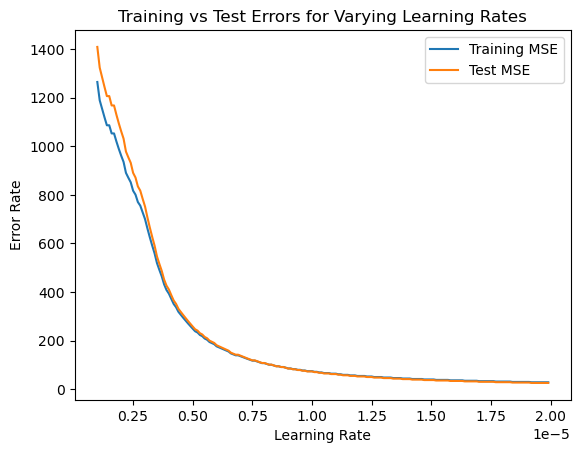

In [24]:
temp1.loop_learning(x_train, x_test, y_train, y_test, 42, 20, temp1.p1, 100)

****MODEL PARAMETERS**** 

Weights
w_ 0  :  4.0 -------> 2.9699144458995215
w_ 1  :  4.0 -------> 0.9244096019676675
w_ 2  :  6.0 -------> 5.260105451733416
w_ 3  :  3.0 -------> 2.5136328462710695
w_ 4  :  5.0 -------> 0.156174300369813
w_ 5  :  1.0 -------> -1.0798152809325325
Iterations :  100 
 Threshold :  0.1 
 Number of Predictors :  5

 Minimum Test MSE 18.597214703777063  for Learning Rate =  1.980000000000002e-05


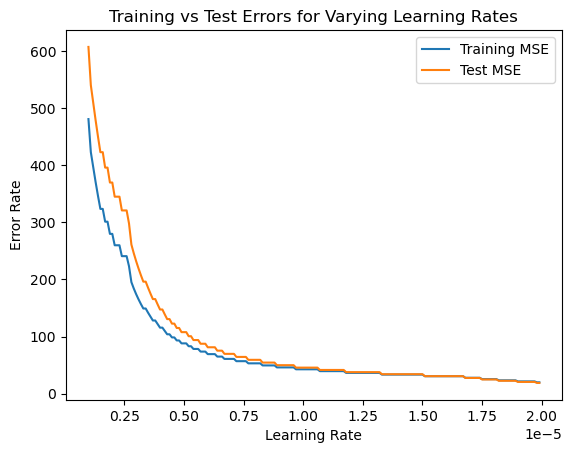

In [25]:
temp1.loop_learning(x_train, x_test, y_train, y_test, 175, 8, temp1.p1, 100)

****MODEL PARAMETERS**** 

Weights
w_ 0  :  18.0 -------> 12.051667285286944
w_ 1  :  16.0 -------> -1.8929684274136946
w_ 2  :  10.0 -------> 5.769782725403159
w_ 3  :  16.0 -------> 12.436895419017619
w_ 4  :  6.0 -------> -0.35205355834481666
w_ 5  :  2.0 -------> -1.615969268709075
Iterations :  100 
 Threshold :  0.1 
 Number of Predictors :  5

 Minimum Test MSE 58.66853056325099  for Learning Rate =  1.940000000000002e-05


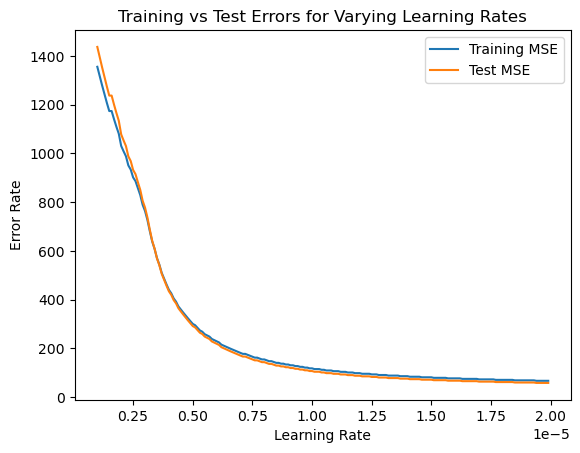

In [26]:
temp1.loop_learning(x_train, x_test, y_train, y_test, 13, 20, temp1.p1, 100)

****MODEL PARAMETERS**** 

Weights
w_ 0  :  1.0 -------> -1.249840315973024
w_ 1  :  3.0 -------> -1.8014354275274826
w_ 2  :  8.0 -------> 6.3741060260889695
w_ 3  :  9.0 -------> 8.164193907452221
w_ 4  :  8.0 -------> 0.33596450459583455
w_ 5  :  18.0 -------> 0.0014008450932089195
Iterations :  100 
 Threshold :  0.1 
 Number of Predictors :  5

 Minimum Test MSE 15.657738854425533  for Learning Rate =  1.7700000000000017e-05


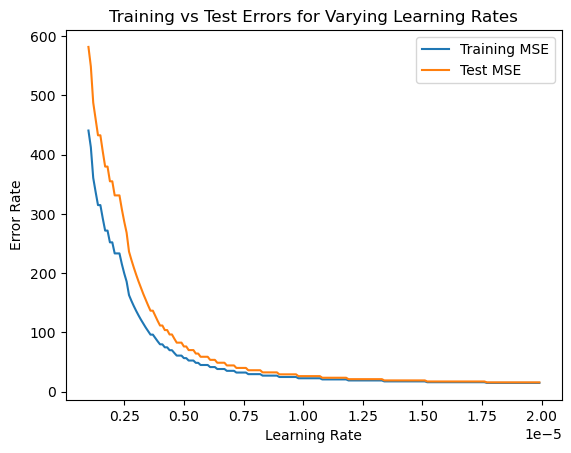

In [27]:
temp1.loop_learning(x_train, x_test, y_train, y_test, 99, 20, temp1.p1, 100)

****MODEL PARAMETERS**** 

Weights
w_ 0  :  1.0 -------> -1.249840315973024
w_ 1  :  3.0 -------> -1.8014354275274826
w_ 2  :  8.0 -------> 6.3741060260889695
w_ 3  :  9.0 -------> 8.164193907452221
w_ 4  :  8.0 -------> 0.33596450459583455
w_ 5  :  18.0 -------> 0.0014008450932089195
Iterations :  100 
 Threshold :  0.1 
 Number of Predictors :  5

 Minimum Test MSE 15.657738854425533  for Learning Rate =  1.7700000000000017e-05


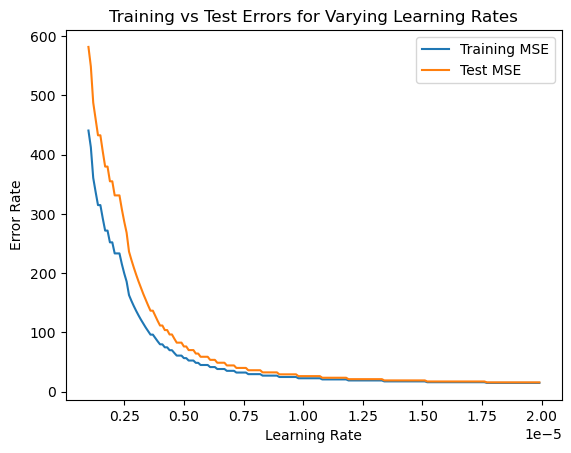

In [28]:
temp1.loop_learning(x_train, x_test, y_train, y_test, 99, 20, temp1.p1, 100,.1)

****MODEL PARAMETERS**** 

Weights
w_ 0  :  1.0 -------> -0.7994155023084777
w_ 1  :  3.0 -------> 0.009728569358408578
w_ 2  :  8.0 -------> 2.1096046681891574
w_ 3  :  9.0 -------> 0.027731262881175542
w_ 4  :  8.0 -------> -0.007667782308123112
w_ 5  :  18.0 -------> -0.005306646611004173
Iterations :  100 
 Threshold :  0.0001 
 Number of Predictors :  5

 Minimum Test MSE 0.036238886649718034  for Learning Rate =  1.990000000000002e-05


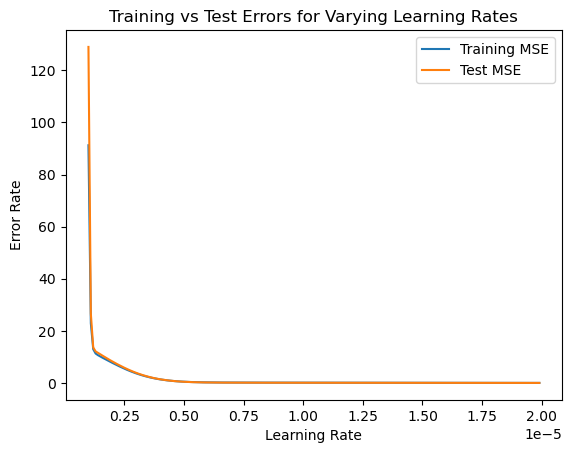

In [29]:
temp1.loop_learning(x_train, x_test, y_train, y_test, 99, 20, temp1.p1, 100, .0001)

****MODEL PARAMETERS**** 

Weights
w_ 0  :  1.0 -------> -0.36836978918199864
w_ 1  :  3.0 -------> 0.002380807848103118
w_ 2  :  8.0 -------> 1.5599588228948493
w_ 3  :  9.0 -------> 0.0026904471013571326
w_ 4  :  8.0 -------> -0.008195489167405179
w_ 5  :  18.0 -------> -0.006546155471701692
Iterations :  10000 
 Threshold :  0.0001 
 Number of Predictors :  5

 Minimum Test MSE 0.027405503901150256  for Learning Rate =  1.990000000000002e-05


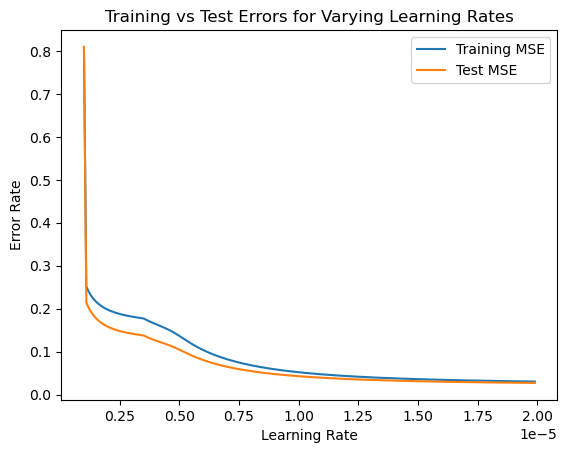

In [30]:
temp1.loop_learning(x_train, x_test, y_train, y_test, 99, 20, temp1.p1, 10000,.0001)

****MODEL PARAMETERS**** 

Weights
w_ 0  :  1.0 -------> 0.2405364549879228
w_ 1  :  3.0 -------> -0.007998828761606827
w_ 2  :  8.0 -------> 0.7835149862220373
w_ 3  :  9.0 -------> -0.032682852348189455
w_ 4  :  8.0 -------> -0.008940941429047366
w_ 5  :  18.0 -------> -0.00829711752053884
Iterations :  100000 
 Threshold :  1e-05 
 Number of Predictors :  5

 Minimum Test MSE 0.022429622010996943  for Learning Rate =  1.990000000000002e-05


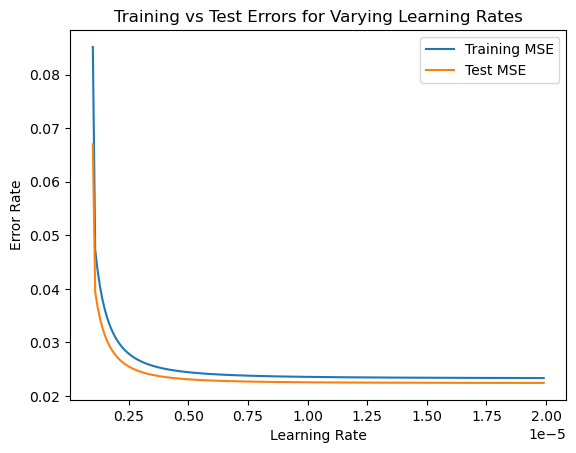

In [31]:
temp1.loop_learning(x_train, x_test, y_train, y_test, 99, 20, temp1.p1, 100000, .00001)

#### Experimenting with Lower Starting Weights

****MODEL PARAMETERS**** 

Weights
w_ 0  :  0.6722785586307918 -------> 0.5424396017093628
w_ 1  :  0.4880783992405837 -------> 0.12223579386148853
w_ 2  :  0.8254951740358963 -------> 0.733153715389117
w_ 3  :  0.031446387626298145 -------> -0.015701886915373716
w_ 4  :  0.8080499633648477 -------> 0.03917347520848537
w_ 5  :  0.5656174196105306 -------> -0.08172650265612746
Iterations :  100 
 Threshold :  0.01 
 Number of Predictors :  5

 Minimum Test MSE 0.15032944845277937  for Learning Rate =  1.8100000000000016e-05


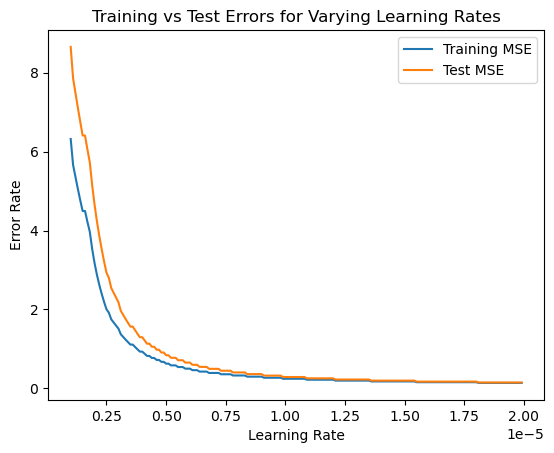

In [32]:
temp2 = GSD_5(df,"actual_productivity", 5, "party time")
temp2.loop_learning(x_train, x_test, y_train, y_test, 99, 20, temp1.p1, 100, .01)

****MODEL PARAMETERS**** 

Weights
w_ 0  :  0.6722785586307918 -------> 0.3687496850907063
w_ 1  :  0.4880783992405837 -------> -0.010559302631354307
w_ 2  :  0.8254951740358963 -------> 0.6218988451115649
w_ 3  :  0.031446387626298145 -------> -0.03936183812542746
w_ 4  :  0.8080499633648477 -------> -0.00911411610620241
w_ 5  :  0.5656174196105306 -------> -0.008742429852767367
Iterations :  100 
 Threshold :  1e-05 
 Number of Predictors :  5

 Minimum Test MSE 0.0225066034002732  for Learning Rate =  1.990000000000002e-05


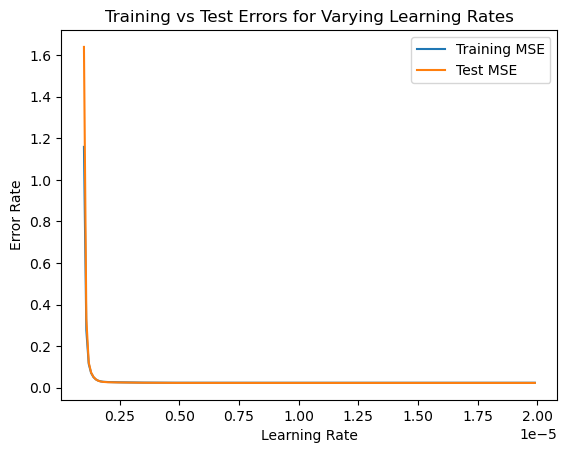

In [33]:
temp2.loop_learning(x_train, x_test, y_train, y_test, 99, 20, temp1.p1, 100, .00001)

****MODEL PARAMETERS**** 

Weights
w_ 0  :  0.6722785586307918 -------> 0.40157916386095144
w_ 1  :  0.4880783992405837 -------> -0.02030430016399857
w_ 2  :  0.8254951740358963 -------> 0.6326466874282622
w_ 3  :  0.031446387626298145 -------> -0.03376293759812437
w_ 4  :  0.8080499633648477 -------> -0.009273190863099353
w_ 5  :  0.5656174196105306 -------> -0.01111076109562508
Iterations :  10000 
 Threshold :  0.0001 
 Number of Predictors :  5

 Minimum Test MSE 0.022853859691915442  for Learning Rate =  1.990000000000002e-05


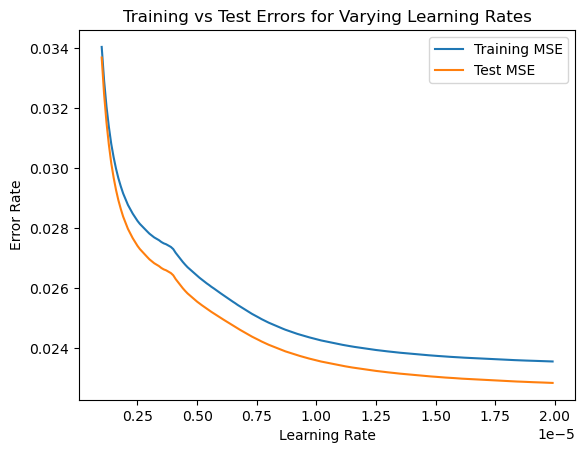

In [34]:
temp2.loop_learning(x_train, x_test, y_train, y_test, 99, 20, temp1.p1, 10000,.0001)

****MODEL PARAMETERS**** 

Weights
w_ 0  :  0.6722785586307918 -------> 0.36874433840601695
w_ 1  :  0.4880783992405837 -------> -0.010558652720481124
w_ 2  :  0.8254951740358963 -------> 0.6219027836157457
w_ 3  :  0.031446387626298145 -------> -0.039362528753501866
w_ 4  :  0.8080499633648477 -------> -0.009114088967741867
w_ 5  :  0.5656174196105306 -------> -0.008742295191248606
Iterations :  100000 
 Threshold :  1e-05 
 Number of Predictors :  5

 Minimum Test MSE 0.022506584802716886  for Learning Rate =  1.990000000000002e-05


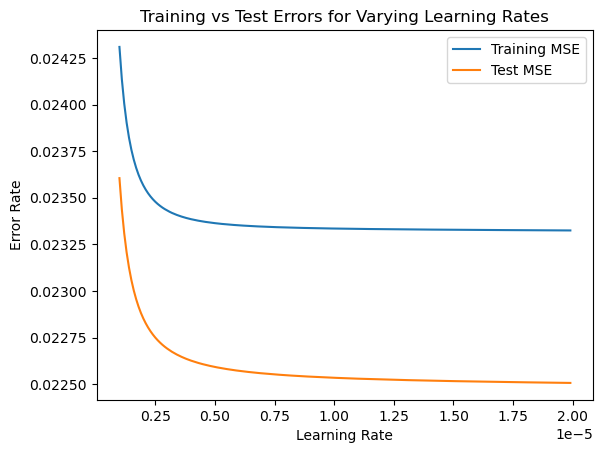

In [35]:
temp2.loop_learning(x_train, x_test, y_train, y_test, 99, 20, temp1.p1, 100000, .00001)

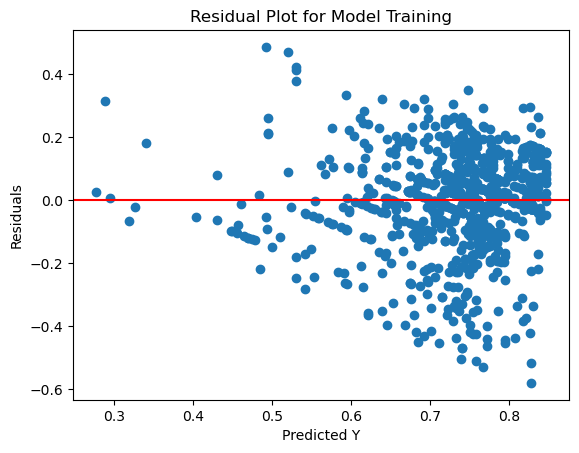

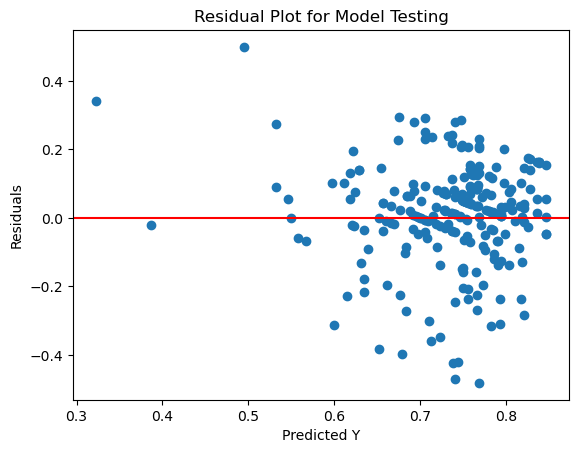

In [36]:
temp2.residual_plot([0.36874433840601695,-0.010558652720481124, 0.6219027836157457, -0.039362528753501866, -0.009114088967741867, -0.008742295191248606],x_train, x_test, y_train, y_test)


#### Scaling Predictors

<AxesSubplot:>

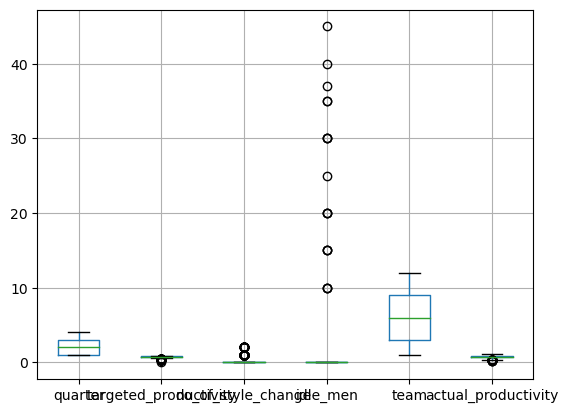

In [69]:
df.boxplot()

In [ ]:
df.idle_men.value_counts()

In [ ]:
idle_outliers = df.loc[df.idle_men > 20]
idle_outliers

In [70]:
temp_df = df.drop([650,654,818,822,841,843,882,1046,1085])
temp_df.loc[temp_df.idle_men > 20]

,quarter,targeted_productivity,no_of_style_change,idle_men,team,actual_productivity


In [71]:
print("Correlations Before Removing Outliers in idle_men Predictor \n",df.corr().actual_productivity)
print("\n\n")
print("Correlations After Removing Outliers in idle_men Predictor \n",temp_df.corr().actual_productivity)

Correlations Before Removing Outliers in idle_men Predictor 
 quarter                 -0.123779
targeted_productivity    0.421594
no_of_style_change      -0.207366
idle_men                -0.181734
team                    -0.148753
actual_productivity      1.000000
Name: actual_productivity, dtype: float64



Correlations After Removing Outliers in idle_men Predictor 
 quarter                 -0.125209
targeted_productivity    0.421826
no_of_style_change      -0.191510
idle_men                -0.073213
team                    -0.148362
actual_productivity      1.000000
Name: actual_productivity, dtype: float64


#### Taking out Weak Predictors

In [37]:
df.corr().drop("actual_productivity")

,quarter,targeted_productivity,no_of_style_change,idle_men,team,actual_productivity
quarter,1.000000,-0.105497,0.249836,-0.010972,0.022426,-0.123779
targeted_productivity,-0.105497,1.000000,-0.209294,-0.053818,0.030274,0.421594
no_of_style_change,0.249836,-0.209294,1.000000,0.133632,-0.011194,-0.207366
idle_men,-0.010972,-0.053818,0.133632,1.000000,0.026974,-0.181734
team,0.022426,0.030274,-0.011194,0.026974,1.000000,-0.148753


In [38]:
#there is a decent positive correlation between style changes and the quarter and targeted productivity. Since targeted productivity has a larger correlation, I'll drop quarter and style changes
adj3_df = df.drop(columns = ["quarter","no_of_style_change"])
adj3_df.head()

,targeted_productivity,idle_men,team,actual_productivity
0,0.80,0,8,0.940725
1,0.75,0,1,0.886500
2,0.80,0,11,0.800570
3,0.80,0,12,0.800570
4,0.80,0,6,0.800382


****MODEL PARAMETERS**** 

Weights
w_ 0  :  0.3745401188473625 -------> 0.19966337938691053
w_ 1  :  0.9507143064099162 -------> 0.8098532191256858
w_ 2  :  0.7319939418114051 -------> -0.009710500708695136
w_ 3  :  0.5986584841970366 -------> -0.00841640162667597
Iterations :  100000 
 Threshold :  1e-05 
 Number of Predictors :  3

 Minimum Test MSE 0.022912209050494976  for Learning Rate =  1.990000000000002e-05


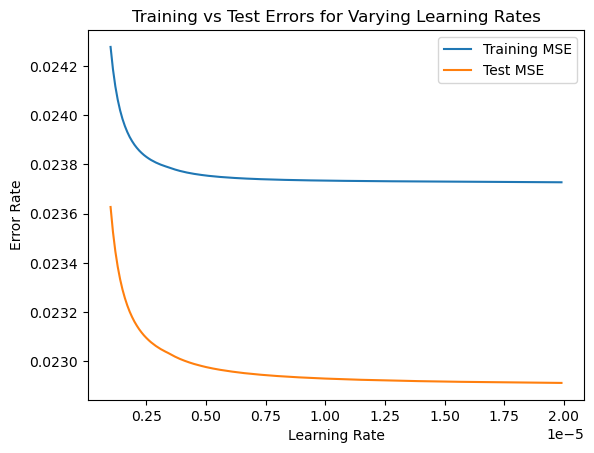

In [39]:
temp3 = GSD_5(adj3_df,"actual_productivity",3, "woohoo")
x_train, x_test, y_train, y_test = temp3.xy_split()
temp3.loop_learning(x_train, x_test, y_train, y_test, 42, 8, temp3.p1, 100000, .00001)

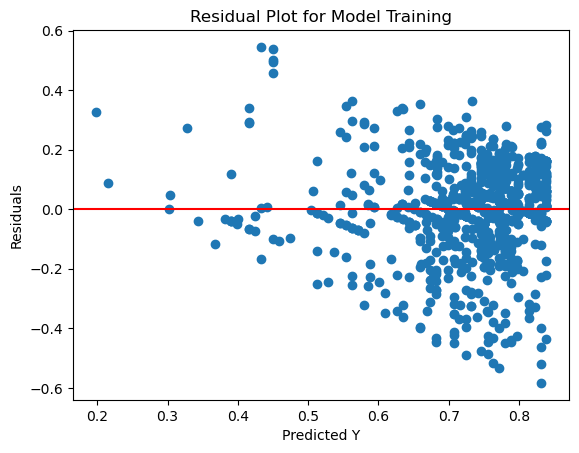

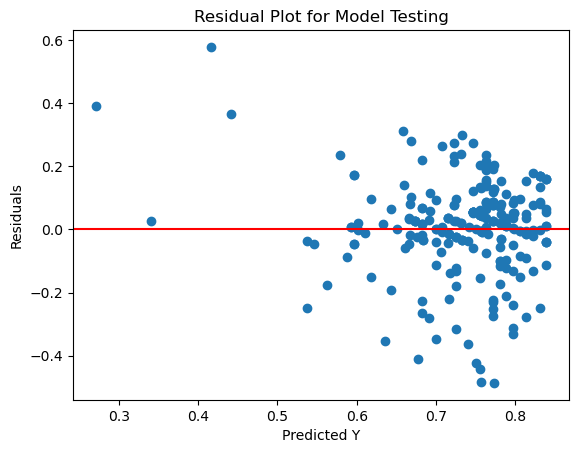

In [40]:
temp3.residual_plot([0.19966337938691053, 0.8098532191256858, -0.009710500708695136, -0.00841640162667597], x_train, x_test, y_train, y_test)


In [41]:
adj1_df = df.drop(columns = ["quarter","no_of_style_change","idle_men", "team"])
adj1_df.head()

,targeted_productivity,actual_productivity
0,0.80,0.940725
1,0.75,0.886500
2,0.80,0.800570
3,0.80,0.800570
4,0.80,0.800382


****MODEL PARAMETERS**** 

Weights
w_ 0  :  0.3745401188473625 -------> 0.15751497340626586
w_ 1  :  0.9507143064099162 -------> 0.7902068560712477
Iterations :  100000 
 Threshold :  1e-05 
 Number of Predictors :  1

 Minimum Test MSE 0.02295117327268457  for Learning Rate =  1.7000000000000007e-06


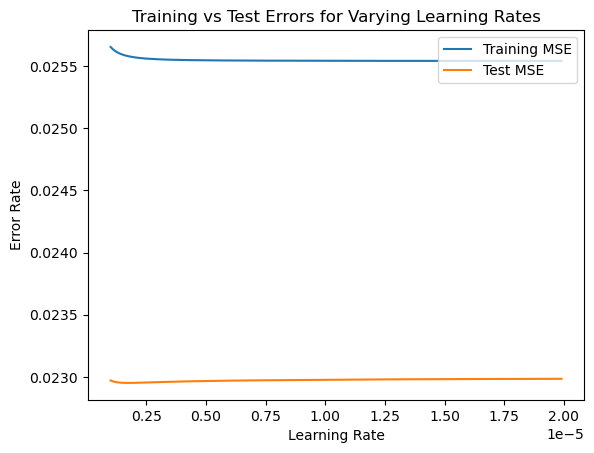

In [42]:
temp4 = GSD_5(adj1_df,"actual_productivity",1, "woohoo")
x_train, x_test, y_train, y_test = temp4.xy_split()
temp4.loop_learning(x_train, x_test, y_train, y_test, 42, 8, temp4.p1, 100000, .00001)

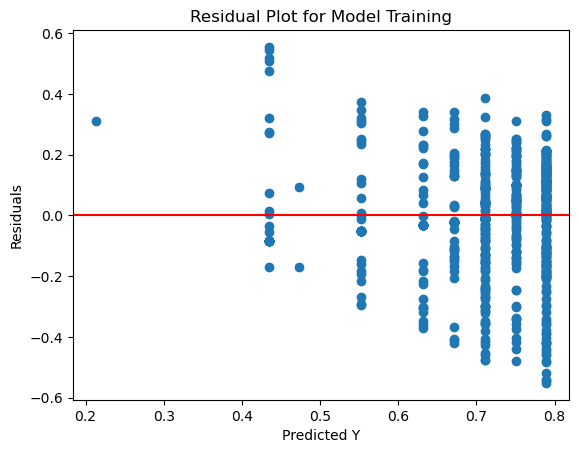

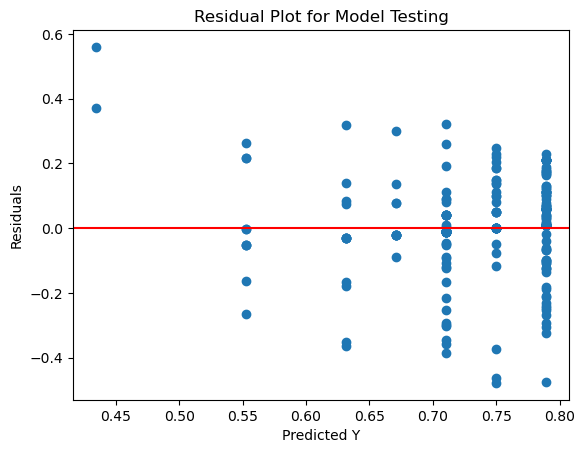

In [43]:
temp4.residual_plot([0.15751497340626586, 0.7902068560712477], x_train, x_test, y_train, y_test)


### Part 2
#### Varying Learning Rates, Iterations, Threshold Values

WEIGHT ESTIMATION
w_ 0  :  0.1049935070783743
w_ 1  :  0.10005692467504848
w_ 2  :  0.08412914492828552
w_ 3  :  -0.005661082521451797
w_ 4  :  -0.010393985863204442
w_ 5  :  0.026394647856479558

 Minimum Test MSE 0.05456808666697007  for Learning Rate =  8.500000000000008e-06


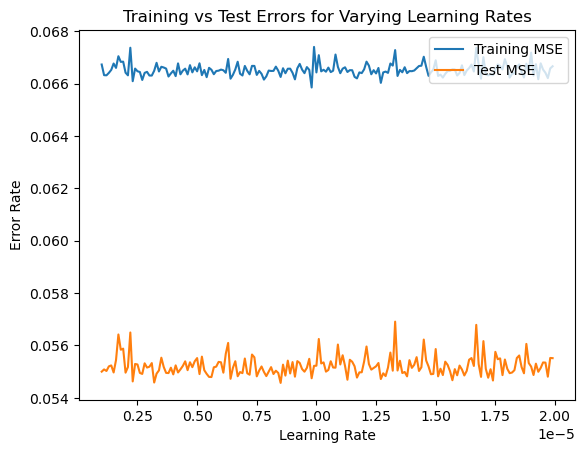

In [73]:
temp5 = GSD_5(df,"actual_productivity",5)
x_train, x_test, y_train, y_test = temp5.xy_split()
temp5.regression(x_train, x_test, y_train, y_test, temp5.p1, "invscaling",100, .01)

WEIGHT ESTIMATION
w_ 0  :  0.10662027973646572
w_ 1  :  0.0985549430001731
w_ 2  :  0.08529099401251704
w_ 3  :  -0.0064599185472602955
w_ 4  :  -0.010199514408648249
w_ 5  :  0.02610003164430874

 Minimum Test MSE 0.05457546711036939  for Learning Rate =  1.1400000000000011e-05


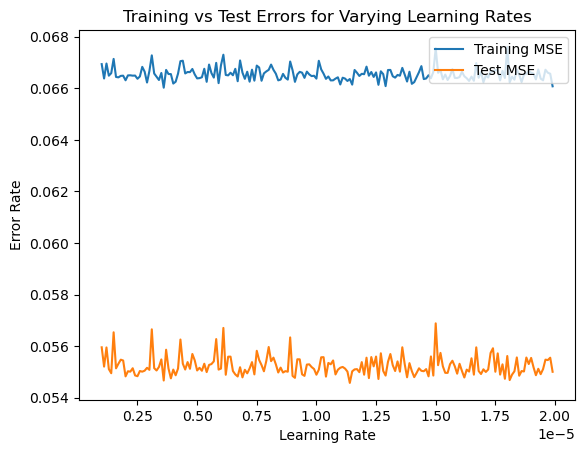

In [47]:
temp5.regression(x_train, x_test, y_train, y_test, temp5.p1, "invscaling", 1000, .01)

WEIGHT ESTIMATION
w_ 0  :  0.1492761556325963
w_ 1  :  0.08677115244579227
w_ 2  :  0.12228403556380106
w_ 3  :  -0.016581013659965886
w_ 4  :  -0.010160877829746081
w_ 5  :  0.0195692905280202

 Minimum Test MSE 0.041746320961302444  for Learning Rate =  5.400000000000004e-06


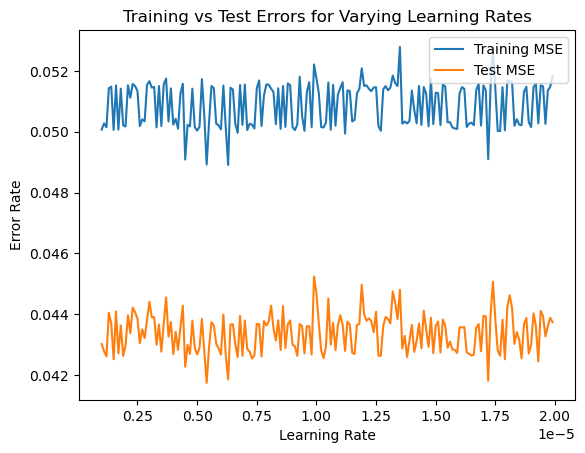

In [48]:
temp5.regression(x_train, x_test, y_train, y_test, temp5.p1, "invscaling", 1000, .001)

WEIGHT ESTIMATION
w_ 0  :  0.24771654678037042
w_ 1  :  0.028355156739672982
w_ 2  :  0.21271597788069757
w_ 3  :  -0.04190903133467496
w_ 4  :  -0.009635694555567923
w_ 5  :  0.001426430678277324

 Minimum Test MSE 0.025436790701931892  for Learning Rate =  1.7400000000000016e-05


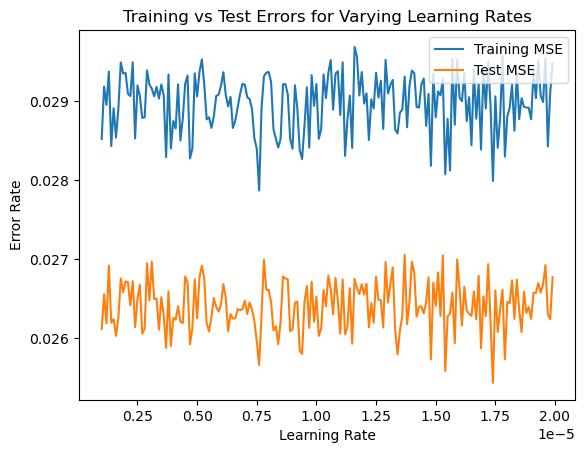

In [49]:
temp5.regression(x_train, x_test, y_train, y_test, temp5.p1, "invscaling", 100000, .0001)

#### Changing the Learning Rate Schedule

WEIGHT ESTIMATION
w_ 0  :  0.3004423539288476
w_ 1  :  -0.01654203632853034
w_ 2  :  0.3101364386226193
w_ 3  :  -0.054930786965386405
w_ 4  :  -0.001350287254207712
w_ 5  :  -0.015914517640820164

 Minimum Test MSE 0.02290111747640603  for Learning Rate =  1.5700000000000016e-05


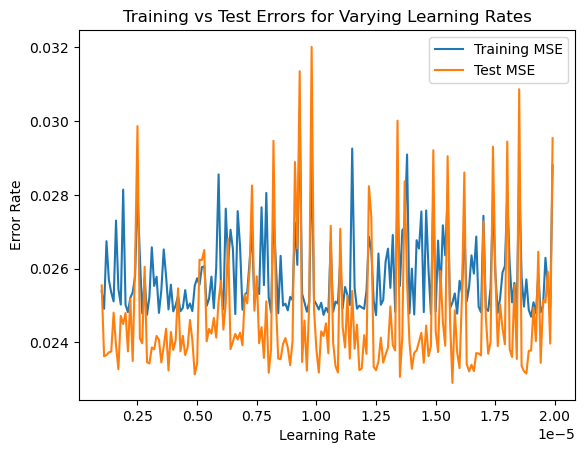

In [50]:
temp5.regression(x_train, x_test, y_train, y_test, temp5.p1, "constant", 100000, .0001)

WEIGHT ESTIMATION
w_ 0  :  1110928400735.6067
w_ 1  :  -1987659071383.8237
w_ 2  :  -3149231577962.1475
w_ 3  :  3608734530219.578
w_ 4  :  9738796471352.363
w_ 5  :  2575648416944.9014

 Minimum Test MSE 1000  for Learning Rate =  1000


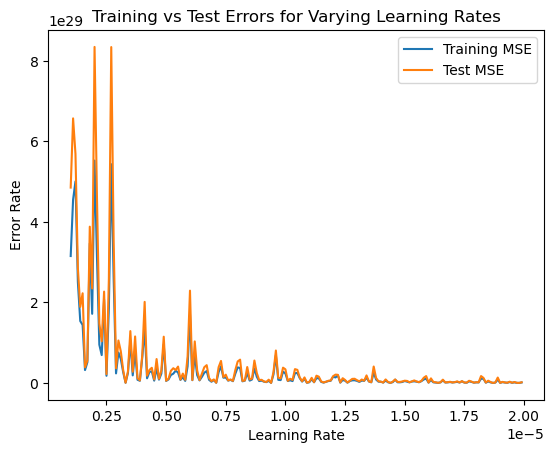

In [51]:
temp5.regression(x_train, x_test, y_train, y_test, temp5.p1, "optimal", 100000, .0001)

In [80]:
temp5.regression(x_train, x_test, y_train, y_test, temp5.p1, "adaptive", 100000, .0001)

WEIGHT ESTIMATION
w_ 0  :  0.2763874604568105
w_ 1  :  0.24987040112296885


IndexError: index 2 is out of bounds for axis 0 with size 2

#### Regression with Fewer Predictors

WEIGHT ESTIMATION
w_ 0  :  0.2923975438283323
w_ 1  :  0.2896794667820305
w_ 2  :  -0.010728546813528812
w_ 3  :  -0.00917633093344121

 Minimum Test MSE 0.024574905076543117  for Learning Rate =  1.2600000000000012e-05


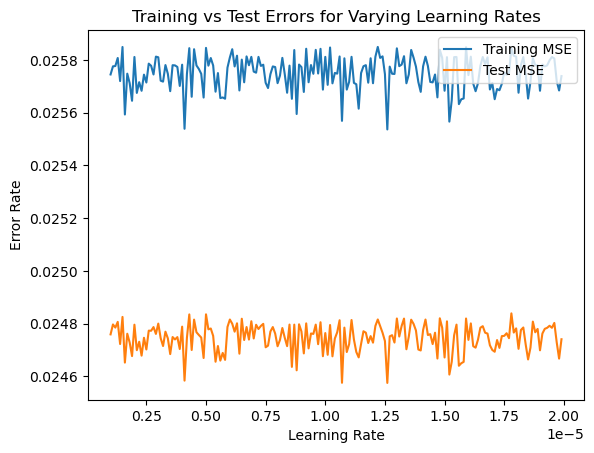

In [75]:
temp6 = GSD_5(adj3_df,"actual_productivity",3)
x_train, x_test, y_train, y_test = temp6.xy_split()
temp6.regression(x_train, x_test, y_train, y_test, temp6.p1, "adaptive",100000, .0001)

WEIGHT ESTIMATION
w_ 0  :  0.28456919492899824
w_ 1  :  0.21868875208471328

 Minimum Test MSE 0.024881122139012425  for Learning Rate =  1.050000000000001e-05


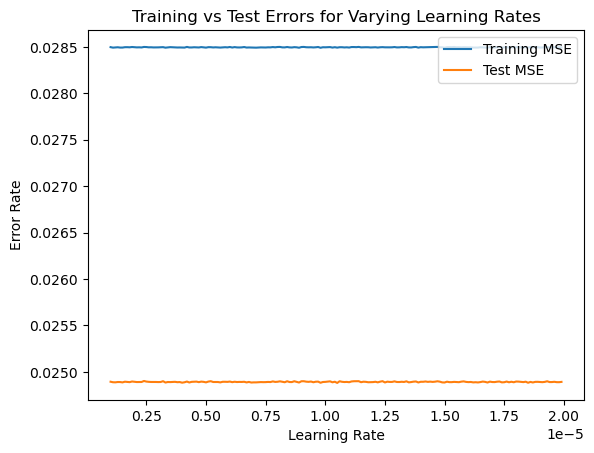

In [78]:
temp7 = GSD_5(adj1_df,"actual_productivity",1)
x_train, x_test, y_train, y_test = temp7.xy_split()
temp7.regression(x_train, x_test, y_train, y_test, temp7.p1, "invscaling",100000, .0001)

WEIGHT ESTIMATION
w_ 0  :  0.2571907907828791
w_ 1  :  0.19284891025734205

 Minimum Test MSE 0.0326880814009939  for Learning Rate =  1.4600000000000014e-05


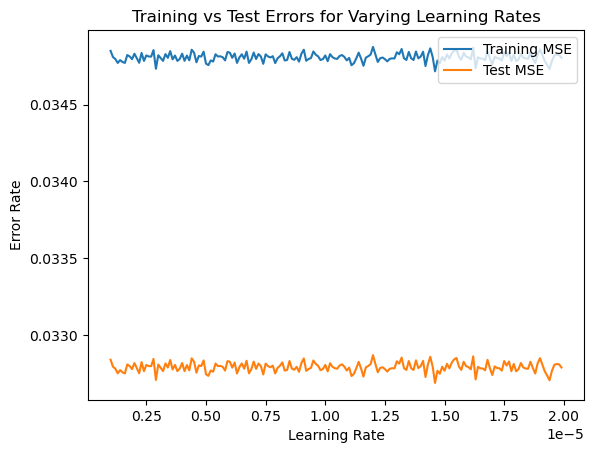

In [79]:
temp7.regression(x_train, x_test, y_train, y_test, temp7.p1, "invscaling",100000, .5)

### Works Cited

Dataset: 
https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees

Gradient Descent Lab from Class: https://colab.research.google.com/drive/1rmblKcJUf0A18GMk7Jx4u6DXnQLf32V6?usp=sharing#scrollTo=QVz-JbxFJXOW

Gradient Descent in R: (helpful for orienting logic) 
https://oindrilasen.com/2018/02/compute-gradient-descent-of-a-multivariate-linear-regression-model-in-r/#:~:text=Similar%20to%20the%20Gradient%20Descent%20for%20a%20Univariate,%28i%29%29.%20xj%20%28i%29%20where%20j%20%3D%200%2C1%2C2%E2%80%A6n%20%7D

Alternate Multiple Linear Regression with Gradient Descent (used generating random weights and using the dot product of A^T * A for squaring the matrix) 
https://www.kaggle.com/code/rakend/multiple-linear-regression-with-gradient-descent

R-Squared: 
https://en.wikipedia.org/wiki/Coefficient_of_determination

Reading in Hosted File: 
https://stackoverflow.com/questions/32400867/pandas-read-csv-from-url